# Part 1 - Import libraries and datasets

In [294]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [128]:
'''Load the dataset. This function can be further modified depending upon if we
  need to perform operations on our dataframes'''
  
def read_dataset(file_path):
  return pd.read_csv(file_path)

In [249]:
df_flights = read_dataset('Flights.csv')
df_tickets = read_dataset('Tickets.csv')
df_airports = read_dataset('Airport_Codes.csv')

<ipython-input-249-abc14da1a676>:1: DtypeWarning: Columns (3,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  df_flights = read_dataset('Flights.csv')


# Part 2  - Quality Check

AIRPORTS DATA

In [250]:
df_airports.shape

(55369, 8)

In [251]:
df_airports.head(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.00,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.00,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.00,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.00,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.00,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [252]:
df_airports['TYPE'].value_counts()

small_airport     34120
heliport          11384
medium_airport     4532
closed             3680
seaplane_base      1016
large_airport       614
balloonport          23
Name: TYPE, dtype: int64

In [253]:
df_airports.isna().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [254]:
''' airport codes data helper function ''' 

def airport_code_helper(df_airports):

  # remove the null values in IATA_CODE column
  df_airports = df_airports.dropna(subset = ['IATA_CODE'])


  # Limit to only medium and large airports
  airport_types = ['medium_airport', 'large_airport']
  df_airports_rev = df_airports[df_airports['TYPE'].isin(airport_types)]


  return df_airports_rev
  

In [255]:
''' airports dataframe to use '''

df_airports_rev = airport_code_helper(df_airports)

In [256]:
df_airports_rev.shape

(4459, 8)

FLIGHTS DATA

In [257]:
df_flights.shape

(1915886, 16)

In [258]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [259]:
df_flights[pd.to_numeric(df_flights['AIR_TIME'], errors='coerce').isnull()]['AIR_TIME'].value_counts()

$$$    1890
Two      10
NAN      10
Name: AIR_TIME, dtype: int64

In [260]:
df_flights[pd.to_numeric(df_flights['DISTANCE'], errors='coerce').isnull()]['DISTANCE'].value_counts()

****       2070
NAN          20
Hundred      10
Twenty       10
Name: DISTANCE, dtype: int64

In [261]:
df_flights[pd.to_numeric(df_flights['DEP_DELAY'], errors='coerce').isnull()]['DEP_DELAY'].value_counts()

Series([], Name: DEP_DELAY, dtype: int64)

In [262]:
df_flights.isna().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64

In [263]:
'''Checking counts for cancelled flights'''
df_flights['CANCELLED'].value_counts()

0.00    1864272
1.00      51614
Name: CANCELLED, dtype: int64

In [264]:
df_flights.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,OCCUPANCY_RATE
count,1915886.00,1915886.00,1865535.00,1859895.00,1915886.00,1915576.00
mean,12688.15,12689.27,10.80,5.65,0.03,0.65
std,1521.90,1521.25,50.16,52.41,0.16,0.20
min,10135.00,10135.00,-63.00,-94.00,0.00,0.30
25%,11292.00,11292.00,-6.00,-15.00,0.00,0.48
50%,12889.00,12889.00,-2.00,-6.00,0.00,0.65
75%,14057.00,14057.00,7.00,8.00,0.00,0.82
max,16218.00,16218.00,2941.00,2923.00,1.00,1.00


In [265]:
df_flights.dtypes

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object

In [266]:
''' flights data helper function ''' 

def flight_helper(df_flights):

  value_at = ['$$$', 'Two', 'NAN']
  value_dist = ['****', 'Hundred', 'NAN', 'Twenty']

  # removing invalid files
  df_flights = df_flights[df_flights.AIR_TIME.isin(value_at) == False]
  df_flights = df_flights[df_flights.DISTANCE.isin(value_dist) == False]
  df_flights = df_flights.dropna(subset = ['DEP_DELAY', 'ARR_DELAY','AIR_TIME'])

  #changing the data types
  df_flights['FL_DATE'] = df_flights['FL_DATE'].apply(pd.to_datetime)
  df_flights[['AIR_TIME','DISTANCE', 'DEP_DELAY']] = df_flights[['AIR_TIME','DISTANCE', 'DEP_DELAY']].apply(pd.to_numeric)

  #limit to only uncancelled flights
  df_flights = df_flights[df_flights['CANCELLED'] == 0.00]

  # limit to only required fields
  df_flights_tmp = df_flights[['FL_DATE','OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DESTINATION',
                                 'DEP_DELAY',	'ARR_DELAY', 'AIR_TIME', 'DISTANCE',
                                 'OCCUPANCY_RATE']]

  return df_flights_tmp                               


In [267]:
'''Get the cleaned flights dataframe'''

df_flights_tmp = flight_helper(df_flights)

In [268]:
df_flights_tmp.shape

(1855725, 10)

In [269]:
''' merge dataframe and rename column'''

def merge_df(df1, df2, left, right, col, col_name):

  tmp_df = pd.merge(df1, df2, left_on = left, right_on = right)
  tmp_df.rename(columns = {col: col_name}, inplace = True)
  tmp_df.drop(columns = ['NAME', 'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY',
       'MUNICIPALITY', 'IATA_CODE', 'COORDINATES'], inplace = True)
  
  return tmp_df

In [270]:
tmp_flight1 = merge_df(df_flights_tmp, df_airports_rev, 'ORIGIN', 'IATA_CODE', 'TYPE', 'ORIGIN_TYPE')

In [271]:
tmp_flight2 = merge_df(tmp_flight1, df_airports_rev, 'DESTINATION', 'IATA_CODE', 'TYPE', 'DESTINATION_TYPE')

In [272]:
tmp_flight2.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE
0,2019-03-02,WN,4591,RSW,CLE,-8.00,-6.00,143.00,1025.00,0.97,large_airport,large_airport
1,2019-03-09,WN,3016,RSW,CLE,-7.00,-22.00,137.00,1025.00,0.63,large_airport,large_airport
2,2019-03-24,UA,2350,RSW,CLE,-16.00,-9.00,129.00,1025.00,0.98,large_airport,large_airport
3,2019-03-11,UA,2350,RSW,CLE,-1.00,8.00,138.00,1025.00,0.36,large_airport,large_airport
4,2019-03-10,UA,2350,RSW,CLE,-6.00,1.00,141.00,1025.00,0.45,large_airport,large_airport


In [273]:
''' function to get avg dep and arr delays on flight data '''

def avg_delay_helper(tmp_flight2):

  tmp_flight2['AVG_DEP_DELAY'] = tmp_flight2.groupby(['ORIGIN', 'DESTINATION'])['DEP_DELAY'].transform('mean')
  tmp_flight2['AVG_ARR_DELAY'] = tmp_flight2.groupby(['ORIGIN', 'DESTINATION'])['ARR_DELAY'].transform('mean')

  return tmp_flight2


In [274]:
''' flights dataframe to use '''
df_flights_rev = avg_delay_helper(tmp_flight2)

In [275]:
df_flights_rev.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,AVG_DEP_DELAY,AVG_ARR_DELAY
0,2019-03-02,WN,4591,RSW,CLE,-8.00,-6.00,143.00,1025.00,0.97,large_airport,large_airport,13.08,7.55
1,2019-03-09,WN,3016,RSW,CLE,-7.00,-22.00,137.00,1025.00,0.63,large_airport,large_airport,13.08,7.55
2,2019-03-24,UA,2350,RSW,CLE,-16.00,-9.00,129.00,1025.00,0.98,large_airport,large_airport,13.08,7.55
3,2019-03-11,UA,2350,RSW,CLE,-1.00,8.00,138.00,1025.00,0.36,large_airport,large_airport,13.08,7.55
4,2019-03-10,UA,2350,RSW,CLE,-6.00,1.00,141.00,1025.00,0.45,large_airport,large_airport,13.08,7.55


Tickets Data

In [277]:
df_tickets.shape

(1167285, 12)

In [278]:
df_tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object

In [279]:
df_tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64

In [280]:
# Checking if there are countries other than US 

df_tickets['ORIGIN_COUNTRY'].value_counts() 

US    1167285
Name: ORIGIN_COUNTRY, dtype: int64

In [281]:
# Checking the years in data

df_tickets['YEAR'].value_counts()

2019    1167285
Name: YEAR, dtype: int64

In [282]:
# Checking the quarters in data

df_tickets['QUARTER'].value_counts()

1    1167285
Name: QUARTER, dtype: int64

In [285]:
df_tickets[pd.to_numeric(df_tickets['ITIN_FARE'], errors='coerce').isnull()]['ITIN_FARE'].value_counts()


200 $       1751
$ 100.00    1085
820$$$       340
Name: ITIN_FARE, dtype: int64

In [286]:
'''tickets data helper function ''' 

def tickets_helper(df_tickets):

  # dropping the null values from ITIN_FARE and PASSENGERS cols
  df_tickets = df_tickets.dropna(subset = ['ITIN_FARE', 'PASSENGERS'])

  #limit to only round trips
  df_tickets = df_tickets[df_tickets['ROUNDTRIP'] == 1]

  # clean the invalid values in ITIN_FARE column
  df_tickets['ITIN_FARE'] = df_tickets['ITIN_FARE'].replace({'200 $': '200', '$ 100.00': '100', '820$$$': '820'})

  # change the data type of ITIN_FARE
  df_tickets['ITIN_FARE'] = df_tickets[['ITIN_FARE']].apply(pd.to_numeric)

  # limit to required columns 
  df_tickets_tmp = df_tickets[['ITIN_ID', 'ORIGIN', 'ROUNDTRIP','REPORTING_CARRIER'
                              ,'ITIN_FARE', 'DESTINATION', 'PASSENGERS']]

  return df_tickets_tmp                            



In [287]:
df_tickets_rev = tickets_helper(df_tickets)

In [288]:
df_tickets_rev.head(5)

,ITIN_ID,ORIGIN,ROUNDTRIP,REPORTING_CARRIER,ITIN_FARE,DESTINATION,PASSENGERS
0,201912723049,ABI,1.00,MQ,736.00,DAB,1.00
1,201912723085,ABI,1.00,MQ,570.00,COS,1.00
2,201912723491,ABI,1.00,MQ,564.00,MCO,1.00
3,201912723428,ABI,1.00,MQ,345.00,LGA,1.00
10,201912723337,ABI,1.00,MQ,1647.00,JAX,1.00


In [289]:
df_tickets_rev.shape

(706849, 7)

In [290]:
df_tickets_rev.isna().sum()

ITIN_ID              0
ORIGIN               0
ROUNDTRIP            0
REPORTING_CARRIER    0
ITIN_FARE            0
DESTINATION          0
PASSENGERS           0
dtype: int64

In [297]:
'''tickets dataframe to use. This is grouped by ORIGIN and DESTINATION to
  get mean fare values '''

df_tic_rev  = df_tickets_rev.groupby(['ORIGIN', 'DESTINATION']).agg({'ITIN_FARE': 
          'mean'}).round(2).rename(columns={'ITIN_FARE': 'AVG_FARE', 'ORIGIN':
                                           'ORIGIN','DESTINATION':'DESTINATION'}).reset_index()

In [298]:
df_tic_rev

,ORIGIN,DESTINATION,AVG_FARE
0,ABE,ABQ,534.00
1,ABE,AGS,299.00
2,ABE,AMA,654.00
3,ABE,ASE,742.00
4,ABE,ATL,505.04
...,...,...,...
40264,YUM,SMF,276.50
40265,YUM,SRQ,696.00
40266,YUM,TOL,335.00
40267,YUM,TPA,544.33


# Part 3 - Analysis

In [295]:
# Get a list of airports of interest
airports = set(list(df_airports_rev['IATA_CODE']))

In [301]:
# Limit the tickets dataframe to only in airports

df_tic = df_tic_rev[(df_tic_rev['ORIGIN'].isin(airports) & 
                                df_tic_rev['DESTINATION'].isin(airports))]

In [300]:
df_tic.shape

(38634, 3)

In [302]:
# Limit the flights dataframe to only in airports

df_flights_rev = df_flights_rev[(df_flights_rev['ORIGIN'].isin(airports) & 
                                df_flights_rev['DESTINATION'].isin(airports))]

In [303]:
df_flights_rev.shape

(1841261, 14)

In [304]:
df_flights_rev.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
OP_CARRIER_FL_NUM            object
ORIGIN                       object
DESTINATION                  object
DEP_DELAY                   float64
ARR_DELAY                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
ORIGIN_TYPE                  object
DESTINATION_TYPE             object
AVG_DEP_DELAY               float64
AVG_ARR_DELAY               float64
dtype: object

In [310]:
''' helper function to create a new merged dataframe from
    flights and tickets dataframes '''

def flights_tickets_merged(df_tic, df_flights):

  ddf_tickets = dd.from_pandas(df_tic, npartitions = 10) 
  ddf_flights = dd.from_pandas(df_flights_rev, npartitions = 10) 
  flights_tickets = dd.merge(ddf_flights, ddf_tickets, on= ['ORIGIN', 'DESTINATION'])

  # create a new column - ROUTE
  flights_tickets['ROUTE'] = flights_tickets['ORIGIN'] + ', ' + flights_tickets['DESTINATION']

  # create a new ID column which has unique ID for each round trip route
  hash_func = lambda n: hash("-".join(sorted(n)))
  flights_tickets['ID'] = flights_tickets[['ORIGIN','DESTINATION']].apply(
      hash_func, axis=1, meta=(None, 'int64'))

  return flights_tickets


In [311]:
flights_tickets = flights_tickets_merged(df_tic, df_flights)

In [312]:
flights_tickets.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,AVG_DEP_DELAY,AVG_ARR_DELAY,AVG_FARE,ROUTE,ID
0,2019-03-01,YX,4512,PNS,MIA,13.00,25.00,96.00,530.00,0.34,medium_airport,large_airport,5.45,4.15,453.38,"PNS, MIA",-2539721863916619444
1,2019-03-02,YX,4512,PNS,MIA,335.00,330.00,73.00,530.00,0.54,medium_airport,large_airport,5.45,4.15,453.38,"PNS, MIA",-2539721863916619444
2,2019-03-03,YX,4512,PNS,MIA,-12.00,-26.00,71.00,530.00,0.63,medium_airport,large_airport,5.45,4.15,453.38,"PNS, MIA",-2539721863916619444
3,2019-03-04,YX,4512,PNS,MIA,-7.00,-11.00,80.00,530.00,0.92,medium_airport,large_airport,5.45,4.15,453.38,"PNS, MIA",-2539721863916619444
4,2019-03-05,YX,4512,PNS,MIA,-7.00,-5.00,80.00,530.00,0.98,medium_airport,large_airport,5.45,4.15,453.38,"PNS, MIA",-2539721863916619444


1. 10 Busiest round trips

In [362]:
'''function to find the 10 busiest round trip routes by number of
   round trip flights'''

def busiest_rndtrips(flights_tickets):

  new_df = flights_tickets.groupby(['ID', 'ORIGIN', 'DESTINATION', 'ROUTE']).agg({
      'OP_CARRIER_FL_NUM': 'count'}).compute().sort_values(by = 'OP_CARRIER_FL_NUM', 
                                                           ascending = False).reset_index()
  new_df['TOTAL_FLIGHTS'] = new_df.groupby('ID')['OP_CARRIER_FL_NUM'].transform('sum')  
  new_df = new_df.drop_duplicates(subset=['ID'])
  new_df = new_df.drop(columns=['ID','OP_CARRIER_FL_NUM'])

  return new_df.nlargest(10, columns = ['TOTAL_FLIGHTS'])


In [363]:
busiest_trips = busiest_rndtrips(flights_tickets)

In [364]:
busiest_trips

,ORIGIN,DESTINATION,ROUTE,TOTAL_FLIGHTS
0,SFO,LAX,"SFO, LAX",8333
2,ORD,LGA,"ORD, LGA",7146
4,LAX,LAS,"LAX, LAS",6506
6,LAX,JFK,"LAX, JFK",6299
8,LAX,SEA,"LAX, SEA",4992
10,LGA,BOS,"LGA, BOS",4816
12,HNL,OGG,"HNL, OGG",4793
13,PDX,SEA,"PDX, SEA",4771
16,ATL,MCO,"ATL, MCO",4707
18,ATL,LGA,"ATL, LGA",4589


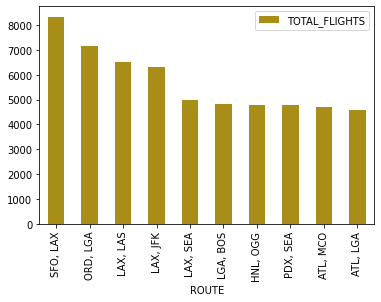

In [371]:
chrt = busiest_trips.plot.bar(x = 'ROUTE', y = 'TOTAL_FLIGHTS', color='#a98d19')

2. 10 Most profitable round trips

In [334]:
''' function to find the total cost '''

def get_cost(miles, origin_type, destination_type, 
             dep_delay, arr_delay):
  
  per_mile_costs = 9.18 * miles

  airport_cost = 0
  if origin_type == 'medium_airport' and destination_type == 'medium_airport':
    airport_cost = 10000
  elif origin_type == 'large_airport' and destination_type == 'large_airport':
    airport_cost = 20000
  else:
    airport_cost = 15000

  delay_cost = 0
  if dep_delay > 15:
    delay_cost += (dep_delay - 15)*75

  if arr_delay > 15:
    delay_cost += (arr_delay - 15)*75

  return per_mile_costs + airport_cost + delay_cost

In [335]:
''' Update flights_tickets dataset '''

def add_info(flights_tickets):

  # Get the passenger count
  flights_tickets['PASSENGER_COUNT'] = flights_tickets['OCCUPANCY_RATE']*200

  # Get the baggage revenue for round trip
  flights_tickets['BAGGAGE_REVENUE'] = flights_tickets['PASSENGER_COUNT']*0.5*35*2 

  # Get total costs
  flights_tickets['TOTAL_COSTS'] = flights_tickets.apply(lambda row: get_cost(
    row['DISTANCE'],row['ORIGIN_TYPE'],row['DESTINATION_TYPE'],
     row['DEP_DELAY'],row['ARR_DELAY']), axis=1, meta=(None, 'float64'))
  
  # Get ticket revenue
  flights_tickets['TICKET_REVENUE'] = flights_tickets['PASSENGER_COUNT'] * flights_tickets['AVG_FARE']

  # Get total revenue
  flights_tickets['TOTAL_REVENUE'] = flights_tickets['TICKET_REVENUE'] + flights_tickets['BAGGAGE_REVENUE']

  # Get profit
  flights_tickets['PROFIT'] = flights_tickets['TOTAL_REVENUE']  - flights_tickets['TOTAL_COSTS']

  return flights_tickets

In [357]:
''' function to find the 10 most profitable round trips '''

def most_profitable(flights_tickets):

  agg_func = {'TOTAL_REVENUE': 'sum',
              'TOTAL_COSTS': 'sum' ,'PROFIT': 'sum','PASSENGER_COUNT':'sum'}
  profit_df = flights_tickets.groupby(['ID', 'ORIGIN', 'DESTINATION']).agg(agg_func).compute(
                ).sort_values(by = 'PROFIT',ascending = False).reset_index()

  profit_df['TOTAL_PROFIT'] = profit_df.groupby('ID')['PROFIT'].transform('sum')
  profit_df = profit_df.drop_duplicates(subset=['ID'])    
  profit_df = profit_df.drop(columns=['ID','PROFIT'])          
  profit_df = profit_df.sort_values(by = 'TOTAL_PROFIT',ascending = False)

  return profit_df.nlargest(10, columns = ['TOTAL_PROFIT'])

In [358]:
flights_tickets = add_info(flights_tickets)

In [359]:
most_profitable = most_profitable(flights_tickets)

In [360]:
most_profitable

,ORIGIN,DESTINATION,TOTAL_REVENUE,TOTAL_COSTS,PASSENGER_COUNT,TOTAL_PROFIT
1,JFK,LAX,406711411.32,137480245.00,406228.00,534724291.22
0,SLC,TWF,339381948.50,4504764.00,34526.00,344222113.76
3,JFK,SFO,244799867.70,84662072.16,241370.00,239991148.02
4,SFO,EWR,173722692.00,55831635.30,157144.00,235723318.70
6,DCA,ORD,133323163.72,50370193.88,238358.00,164677877.48
7,ATL,LGA,148136977.66,65808132.52,301502.00,164417165.82
13,LAX,ATL,138178118.00,59609670.34,199420.00,155297865.78
10,ORD,LGA,188222941.20,106618010.50,464404.00,154622547.98
11,SFO,LAX,186692889.12,106583855.50,545232.00,141942930.38
18,LGA,DCA,113049766.62,40033047.64,219042.00,141850451.34


3. 5 Recommended Round Trips

In [340]:
''' creating a correlation matrix (using Pearson's Correlation) to see which 
    dimension affect profit the most'''

corr_mat = flights_tickets.corr().compute()

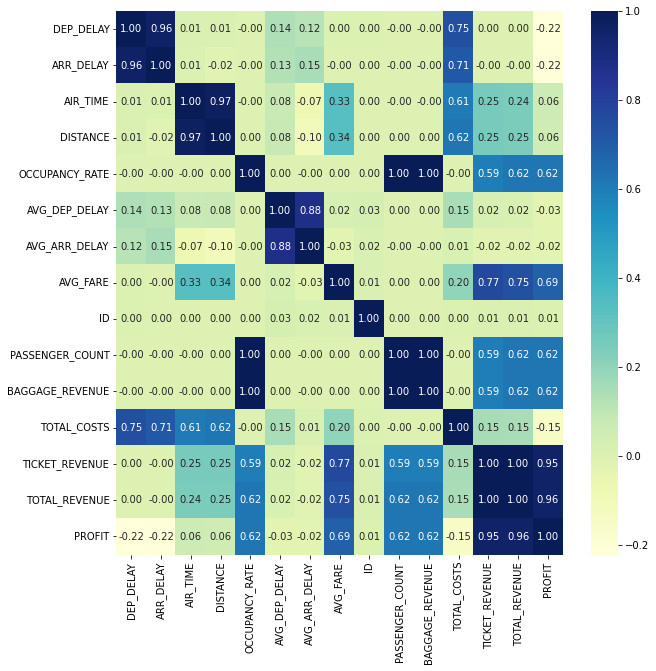

In [341]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sb.heatmap(corr_mat, cmap="YlGnBu", annot=True, ax=ax,fmt=".2f")

In [342]:
flights_tickets.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,...,AVG_ARR_DELAY,AVG_FARE,ROUTE,ID,PASSENGER_COUNT,BAGGAGE_REVENUE,TOTAL_COSTS,TICKET_REVENUE,TOTAL_REVENUE,PROFIT
0,2019-01-01,DL,854,RNO,MSP,32.00,60.00,193.00,1405.00,0.76,...,49.00,513.37,"RNO, MSP",390089390591037712,152.00,5320.00,37547.90,78032.24,83352.24,45804.34
1,2019-01-02,DL,854,RNO,MSP,28.00,38.00,183.00,1405.00,0.88,...,49.00,513.37,"RNO, MSP",390089390591037712,176.00,6160.00,35597.90,90353.12,96513.12,60915.22
2,2019-03-13,OO,3784,CID,MSP,15.00,41.00,48.00,220.00,0.46,...,22.94,512.67,"CID, MSP",-6397834700776843811,92.00,3220.00,23969.60,47165.64,50385.64,26416.04
3,2019-03-13,OO,3809,CID,MSP,107.00,89.00,45.00,220.00,0.96,...,22.94,512.67,"CID, MSP",-6397834700776843811,192.00,6720.00,34469.60,98432.64,105152.64,70683.04
4,2019-03-13,OO,4687,CID,MSP,325.00,312.00,46.00,220.00,0.60,...,22.94,512.67,"CID, MSP",-6397834700776843811,120.00,4200.00,67544.60,61520.40,65720.40,-1824.20


In [343]:
''' function to calculate total delay '''

def delay(arr_delay, dep_delay):
  total_delay = 0

  if arr_delay > 0:
    total_delay += arr_delay

  if dep_delay > 0:
    total_delay += dep_delay

  return total_delay   

In [348]:
''' adding total_delay information to flights_tickets dataframe '''


flights_tickets['DELAY'] = flights_tickets.apply(lambda row: delay(
     row['ARR_DELAY'],row['DEP_DELAY']), axis=1, meta=(None, 'float64'))

In [349]:
flights_tickets.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,...,ROUTE,ID,PASSENGER_COUNT,BAGGAGE_REVENUE,TOTAL_COSTS,TICKET_REVENUE,TOTAL_REVENUE,PROFIT,TOTAL_DELAY,DELAY
0,2019-03-10,WN,3133,DEN,CLE,13.00,-6.00,127.00,1201.00,0.43,...,"DEN, CLE",-2535630527502168788,86.00,3010.00,31025.18,33410.14,36420.14,5394.96,13.00,13.00
1,2019-03-10,WN,6557,DEN,CLE,25.00,5.00,131.00,1201.00,0.56,...,"DEN, CLE",-2535630527502168788,112.00,3920.00,31775.18,43510.88,47430.88,15655.70,30.00,30.00
2,2019-03-29,WN,2114,DEN,CLE,0.00,-9.00,140.00,1201.00,0.59,...,"DEN, CLE",-2535630527502168788,118.00,4130.00,31025.18,45841.82,49971.82,18946.64,0.00,0.00
3,2019-03-25,WN,2114,DEN,CLE,0.00,-7.00,145.00,1201.00,0.58,...,"DEN, CLE",-2535630527502168788,116.00,4060.00,31025.18,45064.84,49124.84,18099.66,0.00,0.00
4,2019-03-25,UA,364,DEN,CLE,-6.00,-23.00,141.00,1201.00,0.84,...,"DEN, CLE",-2535630527502168788,168.00,5880.00,31025.18,65266.32,71146.32,40121.14,0.00,0.00


In [376]:
''' most profit least delay route finder function'''

def most_prft_least_delay(flights_tickets):
  delay_df = flights_tickets.groupby(['ID', 'ORIGIN', 'DESTINATION']).agg({
    'PROFIT': 'sum', 'TOTAL_DELAY': 'sum', 'OP_CARRIER_FL_NUM': 'count'}).compute(
                ).sort_values(by = ['PROFIT','TOTAL_DELAY'] 
                              ,ascending = [False, True]).reset_index()  
  delay_df['TOTAL_FLIGHTS'] = delay_df.groupby('ID')['OP_CARRIER_FL_NUM'].transform('sum')
  delay_df = delay_df.drop_duplicates(subset=['ID'])                                                  
  delay_df.drop(columns = ['ID', 'OP_CARRIER_FL_NUM'], inplace = True)
  return delay_df.nlargest(5, columns = ['PROFIT', 'TOTAL_DELAY'])

In [377]:
recommnded_df = most_prft_least_delay(flights_tickets)

In [387]:
recommnded_df['NUM_TRIPS_REQ'] = (90000000/(recommnded_df['PROFIT']/recommnded_df['TOTAL_FLIGHTS'])).round(0)

In [388]:
recommnded_df 

,ORIGIN,DESTINATION,PROFIT,TOTAL_DELAY,TOTAL_FLIGHTS,NUM_TRIPS_REQ
0,SLC,TWF,334877184.50,4503.00,580,156.00
1,JFK,LAX,269231166.32,66100.00,6299,2106.00
3,JFK,SFO,160137795.54,71178.00,3700,2079.00
4,SFO,EWR,117891056.70,55030.00,2411,1841.00
6,DCA,ORD,82952969.84,53511.00,3688,4001.00


In [385]:
break_even = recommnded_df.drop(columns = ['PROFIT', 'TOTAL_DELAY', 'TOTAL_FLIGHTS'])

In [386]:
break_even

,ORIGIN,DESTINATION,NUM_TRIPS_REQ
0,SLC,TWF,156.00
1,JFK,LAX,2106.00
3,JFK,SFO,2079.00
4,SFO,EWR,1841.00
6,DCA,ORD,4001.00
